## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [48]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

--2024-01-17 13:41:38--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2024-01-17 13:41:39--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc050801f72200327569d2d1d17e.dl.dropboxusercontent.com/cd/0/inline/CLhLFzxfdRd5XJF9pXadtY5KjNWKwBKC6RPFEmeCzpOKwd-d4WF5eM1UDgFai4RlS2T0Cy0QdnhqsiZsRNo-W8TkFRzR1p_6Oj7ZF3Myo6Sn2OP7uvhg-g5eNsUIHBP5vMU/file# [following]
--2024-01-17 13:41:39--  https://uc050801f72200327569d2d1d17e.dl.dropboxusercontent.com/cd/0/inline/CLhLFzxfdRd5XJF9pXadtY5KjNWKwBKC6RPFEmeCzpOKwd-d4WF5eM1UDgFai4RlS2T0Cy0QdnhqsiZsRNo-W8TkFRzR1p_6Oj7ZF3Myo6Sn2OP7uvhg-g5eNsUIHBP5vMU/file
Res

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.



In [2]:
import numpy as np
import pandas as pd
path = '/Users/giacomo/data/data_000637.txt'

#create a dataset with N defined raws
N = 1e6
dataset = pd.read_csv(path)




In [3]:
#first check of the dataset 
dataset.head()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25


2\. Find out the number of BX in a ORBIT (the value 'x').



In [4]:
#likely the BX values in an orbit is near the max values for each orbit 
BX_max = dataset['BX_COUNTER'].max()
print('max values of BX in dataset', BX_max)

TDC_max= dataset['TDC_MEAS'].max()
print('max values of TDC in dataset', TDC_max)



max values of BX in dataset 3563
max values of TDC in dataset 29


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.



In [5]:
#lets do it in two ways 

#total time obained just looking at the orbit 
total_time_ORBIT = dataset['ORBIT_CNT'].max()-dataset['ORBIT_CNT'].min()
print('total meas. time:', total_time_ORBIT, 'ORBIT' )

#now let estimate the time with some math...
total_time_BX = dataset.groupby('ORBIT_CNT')['BX_COUNTER'].max().sum()
total_time_ORBIT = total_time_BX/dataset['BX_COUNTER'].max()

print('total meas time Estimated:', round(total_time_ORBIT), 'ORBIT')

#considering time in BX count as (time_ORBIT * max_BX) 
#and knowing that one BX count is 25 ns we can estimate the total time as:
total_time_ns = ((dataset['ORBIT_CNT'].max()-dataset['ORBIT_CNT'].min()) * BX_max + dataset['ORBIT_CNT'].iloc[-1] ) * 25
print('total time in ns:', total_time_ns, 'ns')

total meas. time: 11004 ORBIT
total meas time Estimated: 10128 ORBIT
total time in ns: 97710460575 ns


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).



In [6]:
#converting everithing in ns using the information in the description 
dataset['ns'] = ((dataset['ORBIT_CNT']-dataset['ORBIT_CNT'].min()) * BX_max + dataset['BX_COUNTER'])* 25 + dataset['TDC_MEAS']*(25/30)
dataset


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ns
0,1,0,123,3869200167,2374,26,5.937167e+04
1,1,0,124,3869200167,2374,27,5.937250e+04
2,1,0,63,3869200167,2553,28,6.384833e+04
3,1,0,64,3869200167,2558,19,6.396583e+04
4,1,0,64,3869200167,2760,25,6.902083e+04
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,9.802004e+08
1310716,1,1,4,3869211171,763,11,9.802004e+08
1310717,1,0,64,3869211171,764,0,9.802004e+08
1310718,1,0,139,3869211171,769,0,9.802005e+08


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.



In [7]:
dataset['HEAD'] = np.random.choice([0,1], dataset.shape[0])
dataset


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ns
0,0,0,123,3869200167,2374,26,5.937167e+04
1,1,0,124,3869200167,2374,27,5.937250e+04
2,1,0,63,3869200167,2553,28,6.384833e+04
3,1,0,64,3869200167,2558,19,6.396583e+04
4,0,0,64,3869200167,2760,25,6.902083e+04
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,9.802004e+08
1310716,0,1,4,3869211171,763,11,9.802004e+08
1310717,1,0,64,3869211171,764,0,9.802004e+08
1310718,0,0,139,3869211171,769,0,9.802005e+08


6\. Create a new DataFrame that contains only the rows with HEAD=1.



In [8]:
#create a mask and then filter the dataset 
mask = dataset['HEAD'] == 1
new_dataset = dataset[mask]
new_dataset



,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ns
1,1,0,124,3869200167,2374,27,5.937250e+04
2,1,0,63,3869200167,2553,28,6.384833e+04
3,1,0,64,3869200167,2558,19,6.396583e+04
5,1,0,63,3869200167,2762,4,6.905333e+04
9,1,0,60,3869200167,2788,7,6.970583e+04
...,...,...,...,...,...,...,...
1310710,1,1,36,3869211171,427,13,9.801920e+08
1310711,1,1,39,3869211171,430,0,9.801920e+08
1310713,1,0,64,3869211171,758,18,9.802003e+08
1310715,1,0,62,3869211171,762,14,9.802004e+08


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel



In [91]:
mask_1 = dataset['FPGA'] == 1
mask_2 = dataset['FPGA'] == 0

#sorting the datafrem by channels
TDC_dataset_1 = dataset[mask_1].sort_values(by='TDC_CHANNEL')
TDC_dataset_2 = dataset[mask_2].sort_values(by='TDC_CHANNEL')

#adding a counter column 
TDC_dataset_1['N'] = np.ones(TDC_dataset_1.shape[0])
TDC_dataset_2['N'] = np.ones(TDC_dataset_2.shape[0])

#creating an array with count for each channel 
meas_count_1 = np.array(TDC_dataset_1.groupby('TDC_CHANNEL')['N'].sum())
meas_count_2 = np.array(TDC_dataset_2.groupby('TDC_CHANNEL')['N'].sum())

#creating unique channels 
unique_channels_1 = np.unique(TDC_dataset_1['TDC_CHANNEL'])
unique_channels_2 = np.unique(TDC_dataset_2['TDC_CHANNEL'])


8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)



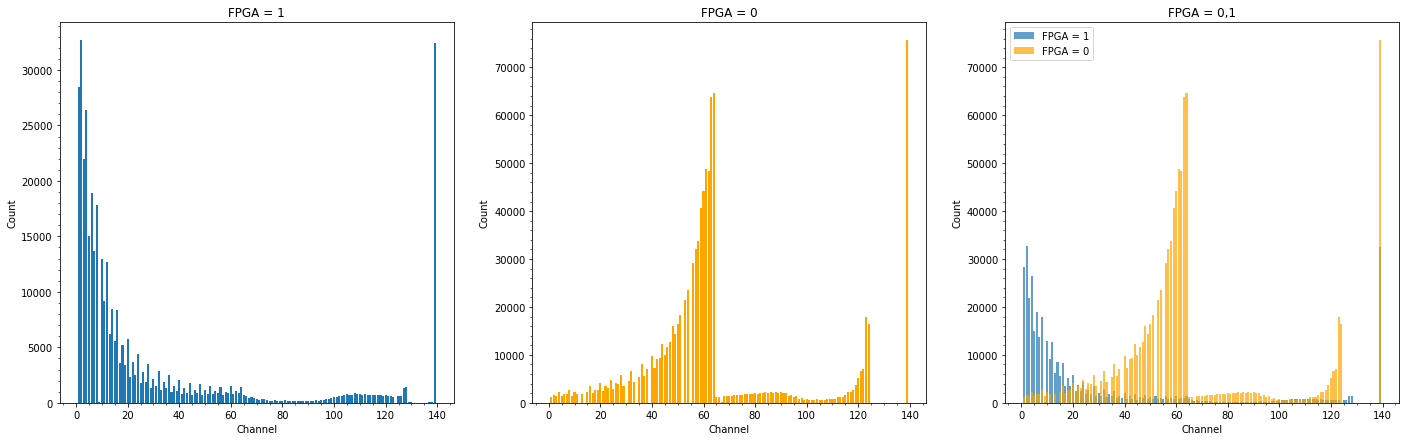

In [120]:
import matplotlib
from matplotlib import pyplot as plt

#create a barplot in order to visualize the different chiannels... it's evident that ch. 139 is very noisy 
fig = plt.figure(figsize=(24,7))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)



ax1.bar(unique_channels_1,meas_count_1)
ax1.set_title('FPGA = 1')
ax1.minorticks_on()
ax1.set_xlabel('Channel')
ax1.set_ylabel('Count')

ax2.bar(unique_channels_2,meas_count_2, color = 'orange')
ax2.set_title('FPGA = 0')
ax2.minorticks_on()
ax2.set_xlabel('Channel')
ax2.set_ylabel('Count')

ax3.bar(unique_channels_1,meas_count_1, alpha = 0.7, label = 'FPGA = 1')
ax3.bar(unique_channels_2,meas_count_2, alpha = 0.7, color = 'orange', label = 'FPGA = 0')
ax3.set_title('FPGA = 0,1')
ax3.minorticks_on()
ax3.set_xlabel('Channel')
ax3.set_ylabel('Count')
ax3.legend()






9\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [122]:
mask_139 = new_dataset['TDC_CHANNEL'] == 139
count_139 = new_dataset[mask_139]

unique_orbit = np.unique(count_139['ORBIT_CNT'])
print('Unique orbit count in channel 139\n', unique_orbit)

Unique orbit count in channel 139
 [3869200167 3869200168 3869200169 ... 3869211169 3869211170 3869211171]
